<a href="https://colab.research.google.com/github/sam-349/WildFire-Det/blob/main/WildFire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brsdincer/wildfire-detection-image-data")

print("Path to dataset files:", path)

100%|██████████| 24.9M/24.9M [00:00<00:00, 90.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/brsdincer/wildfire-detection-image-data/versions/1


In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/forest_fire'
train_dir = '/content/drive/MyDrive/Colab Notebooks/forest_fire/Training'
test_dir = '/content/drive/MyDrive/Colab Notebooks/forest_fire/Testing'

print("Training directory exists:", os.path.exists(train_dir))
print("Testing directory exists:", os.path.exists(test_dir))

Training directory exists: True
Testing directory exists: True


In [6]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory(test_dir,
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='binary')


Found 1837 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [7]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [8]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
r = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 236s 4s/step - accuracy: 0.8330 - loss: 0.4122 - val_accuracy: 0.9118 - val_loss: 0.2900
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9498 - loss: 0.1469 - val_accuracy: 0.8971 - val_loss: 0.2693
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9529 - loss: 0.1492 - val_accuracy: 0.8529 - val_loss: 0.2776
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.9490 - loss: 0.1415 - val_accuracy: 0.9118 - val_loss: 0.2204
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9722 - loss: 0.0897 - val_accuracy: 0.9118 - val_loss: 0.1612


In [11]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)
print(len(predictions))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step
68


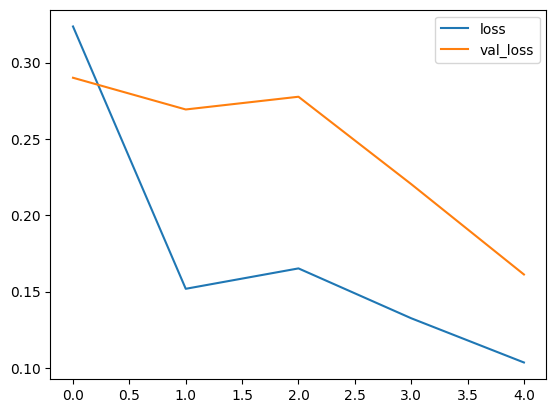

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

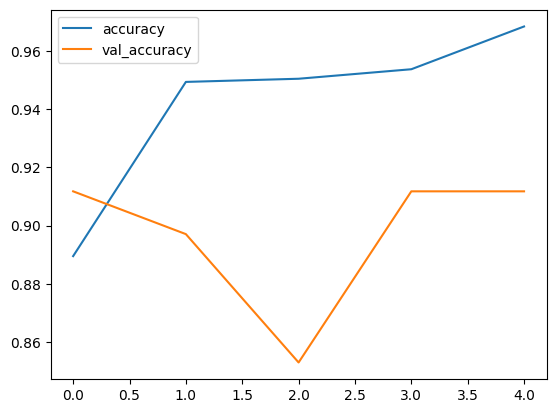

In [13]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [14]:
def predictImage(filename):
  img = image.load_img(filename, target_size=(150, 150))
  plt.imshow(img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  val = model.predict(images)
  print(val)
  if val == 1:
    plt.xlabel("No Fire", fontsize=30)

  elif val == 0:
      plt.xlabel("Fire", fontsize=30)

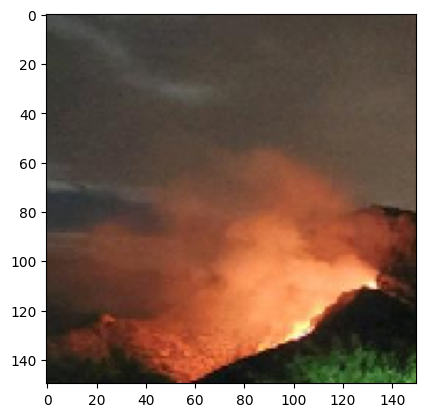

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[0.]]


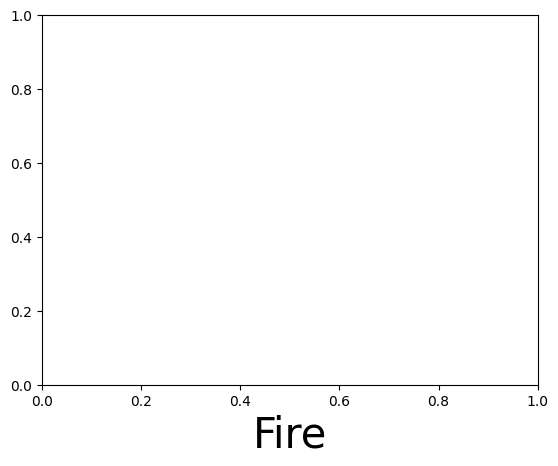

In [21]:
# predictImage("filename")
predictImage("/content/drive/MyDrive/Colab Notebooks/forest_fire/Testing/fire/abc170.jpg")


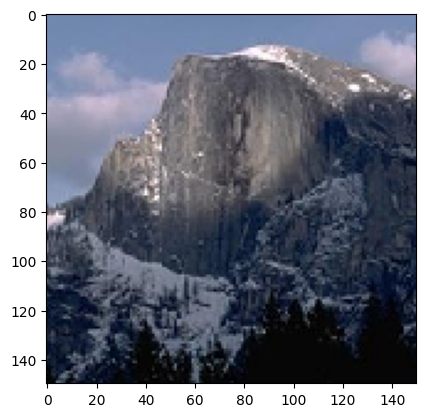

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[1.]]


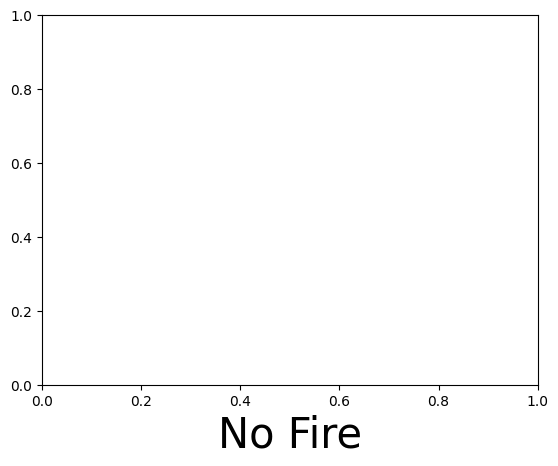

In [20]:
# predictImage("filename")
predictImage("/content/drive/MyDrive/Colab Notebooks/forest_fire/Testing/nofire/abc335.jpg")
